## Telco Customer Churn EDA

### Import required packages and load dataset

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

### The dataset has no associated null values within any of the columns. There are 7,043 records in the dataset with 21 columns. The response variable is 'Churn' and is a categorical variable (Yes/No) indicating if the customer churned 

In [34]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

# print first few rows of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 10 categorical variables, 7 binary variables, 3 numeric variables, 1 primary key. Most variables have 2 to 4 unique values, which should prove useful for modeling 

In [35]:
pd.concat([df.isna().sum(),df.nunique()],axis=1).rename(columns = {0:'Nulls',1:'Uniques'})

,Nulls,Uniques
customerID,0,7043
gender,0,2
SeniorCitizen,0,2
Partner,0,2
Dependents,0,2
tenure,0,73
PhoneService,0,2
MultipleLines,0,3
InternetService,0,3
OnlineSecurity,0,3


### Most binary/categorical variables are either "Yes/No" or "Yes/No/No Internet Service". We will want to convert these to numeric indicators for model preprocessing 

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert Total Charges variable to float for numeric analysis and impute median value for records converted to NA after float conversion

In [37]:
# convert the data type of TotalCharges from 'object' to 'float'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### 73% of customers do not churn, Binary “Yes” for customer churn and “No” for a customer not churning. May need to employ over/under-sampling for modeling purposes 

No     5174
Yes    1869
Name: Churn, dtype: int64


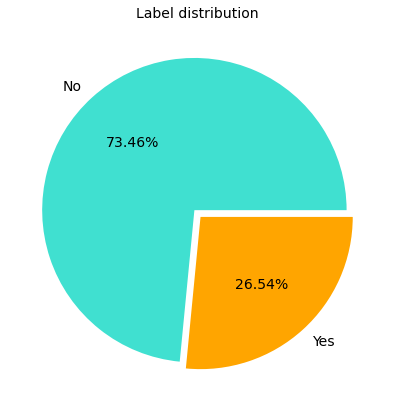

In [39]:
# Distribution of the output variable (Pie Chart)

print(df['Churn'].value_counts())

pie, ax = plt.subplots(figsize=[10,7])
labels = ['No', 'Yes']
colors = ['turquoise', 'orange']
plt.pie(x = df['Churn'].value_counts()
        , autopct='%.2f%%', labels=labels, colors = colors, textprops={'fontsize': 14}, explode=[0.03]*2)
plt.title('Label distribution',fontsize=14)
plt.show()

### Tenure with the company has the widest distribution of values. Monthly charges also show a relatively large distribution, which could prove useful in modeling 

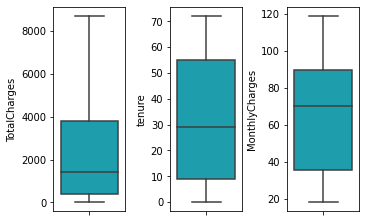

In [40]:
# df_vis dataframe contains 3 numerical columns that are in types of "int" and "float". 

df_vis = df[['TotalCharges',
'tenure',
'MonthlyCharges']]

# Layout the whisker plots of the distribution of all 20 numerical variables. 

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(5, 3))
index = 0
axs = axs.flatten()
for k,v in df_vis.items():
    sns.boxplot(y=k, data=df_vis, ax=axs[index],color = '#06b1c4')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Bucketing numeric variables into categorical options may provide additional value. 

#### Total Charges: Exponential Distribution. Medium/High total charges may have a high correlation with churn

#### Tenure: Spikes for new customers and long-term customers. Mid-tenure customers may have higher churn rates

#### Monthly Charges: Several distinct groups. Individual spikes may indicate different contract types

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

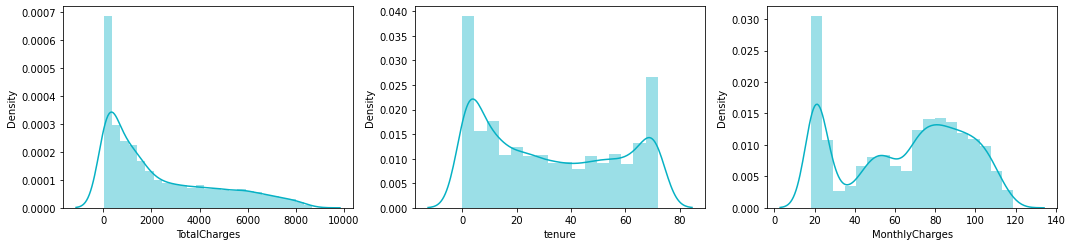

In [41]:
# Layout the histograms and curves of the distribution of 3 numerical variables. 

plt.figure(figsize=(15,20))

col = ['TotalCharges',
'tenure',
'MonthlyCharges']

a = 1
for i in range(len(col)):
    plt.subplot(6, 3, a); 
    sns.distplot(df_vis[col[i]], color = '#06b1c4')
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

### Several of the categorical variables are Yes/No with an additional option for no internet service. We see significant imbalances in the senior citizens variable and phone service variable. Most other variables are less drastically imbalanced

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

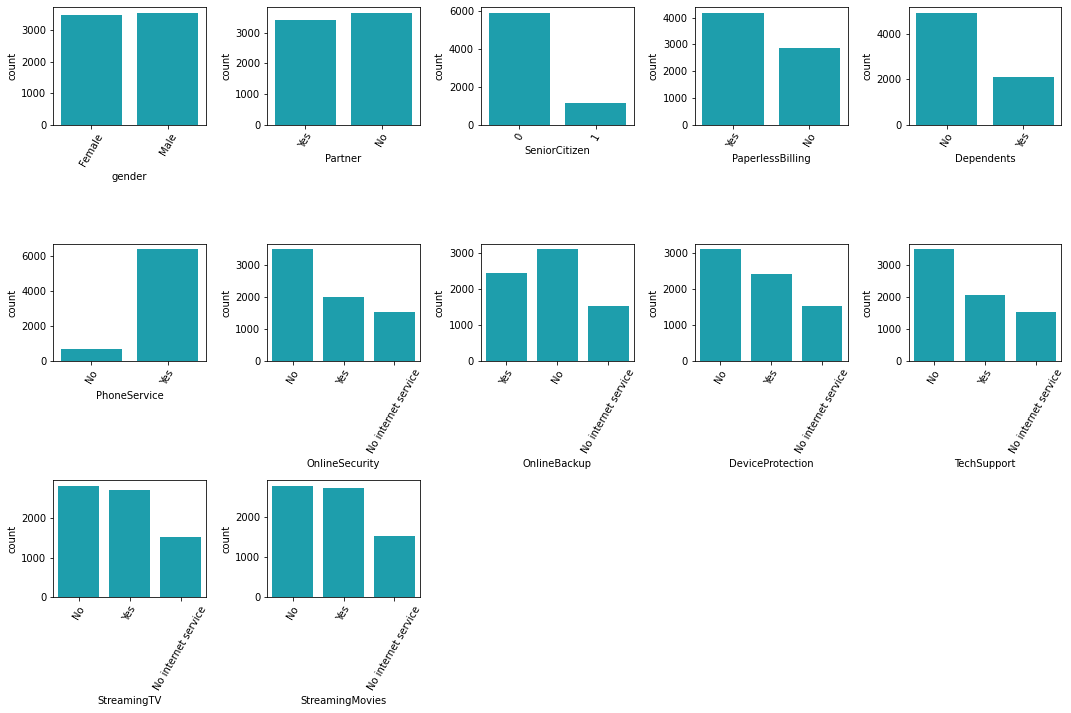

In [42]:
# histograms of 13 binary variables

df_binary = df[['gender','Partner','SeniorCitizen','PaperlessBilling','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]


plt.figure(figsize=(15,10))

col = ['gender','Partner','SeniorCitizen','PaperlessBilling','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

a = 1
for i in range(len(col)):
    plt.subplot(3, 5, a); 
    countplt = sns.countplot(df_binary[col[i]], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

### We see that Month-to-Month contracts are most common. Electronic Check is the most popular payment method, but by a smaller margin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


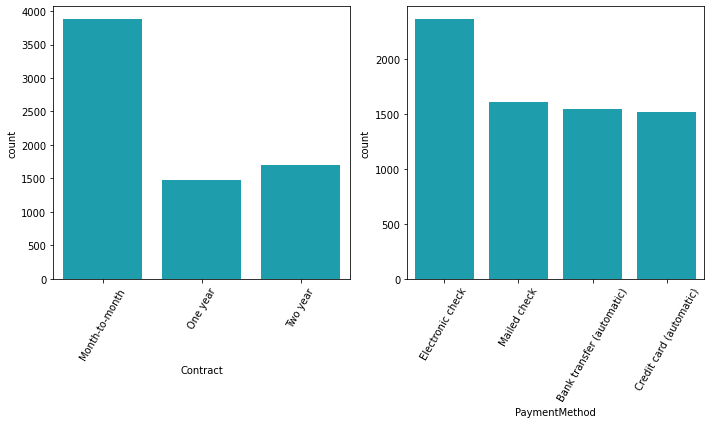

In [57]:
# histograms of types of 'Contract' and 'PaymentMethod'

df_cat = df[['Contract','PaymentMethod']]


plt.figure(figsize=(10,6))

col = ['Contract','PaymentMethod']

a = 1
for i in range(len(col)):
    plt.subplot(1, 2, a); 
    countplt = sns.countplot(df_cat[col[i]], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

### Convert Tenure with the company into categories for new, middle, long-term customers. Break monthly charges into categories for low, medium, high monthly charges. Break total charges into categories for low, high total charges 

In [51]:
# Convert Tenure with the company into categories for new, middle, long-term customers 
df.loc[df['tenure']<=15, 'tenureCat'] = "New Customers"
df.loc[df['tenure'].between(16,50), 'tenureCat'] = "Middle Customers"
df.loc[df['tenure']>=51, 'tenureCat'] = "Long-Time Customers"

# Break monthly charges into categories for low, medium, high monthly charges 
df.loc[df['MonthlyCharges']<=35, 'MCC'] = "0-35"
df.loc[df['MonthlyCharges'].between(36,65), 'MCC'] = "36-65"
df.loc[df['MonthlyCharges']>=66, 'MCC'] = ">66"

# Break total charges into categories for low, high total charges 
df.loc[df['TotalCharges']<=2000, 'TCC'] = "0-2000"
df.loc[df['TotalCharges']>=2001, 'TCC'] = ">2000"

### Churn rates broken out by categorical variables show the following:

#### New customers are much more likely to churn

#### Customers without online security are much more likely to churn

#### Customers with a month-to-month contract are much more likely to churn

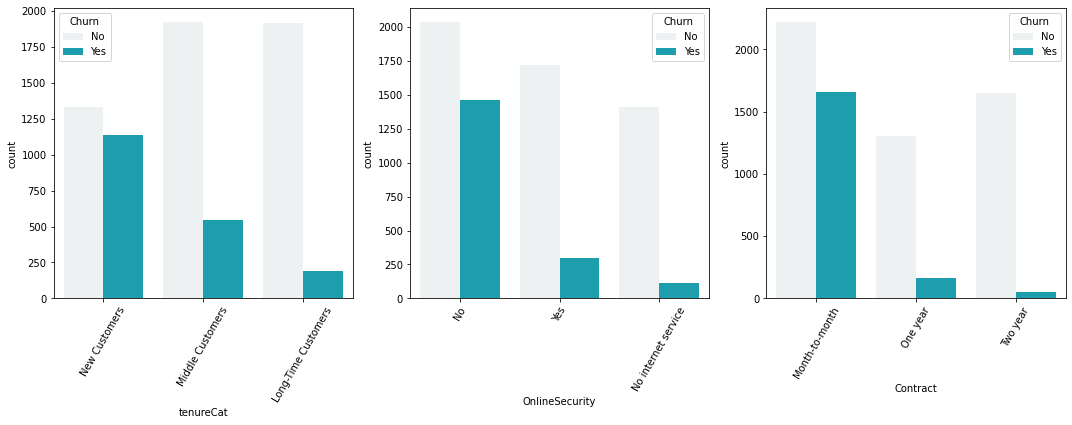

In [64]:
# Churn rates broken out by categorical variables 

df_churn = df[['tenureCat','OnlineSecurity','Contract']]


plt.figure(figsize=(15,6))

col = ['tenureCat','OnlineSecurity','Contract']

a = 1
for i in range(len(col)):
    plt.subplot(1, 3, a); 
    countplt = sns.countplot(x = df_churn[col[i]], hue = df["Churn"], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

### Churn rates broken out by total and monthly charge categorizations show the following: 

#### Customers with less than 2,000 in total charges are much more likely to churn. This most likely aligns with them being newer customers, who are much more likely to churn

#### Customers with a higher monthly charge rate are more likely to churn 

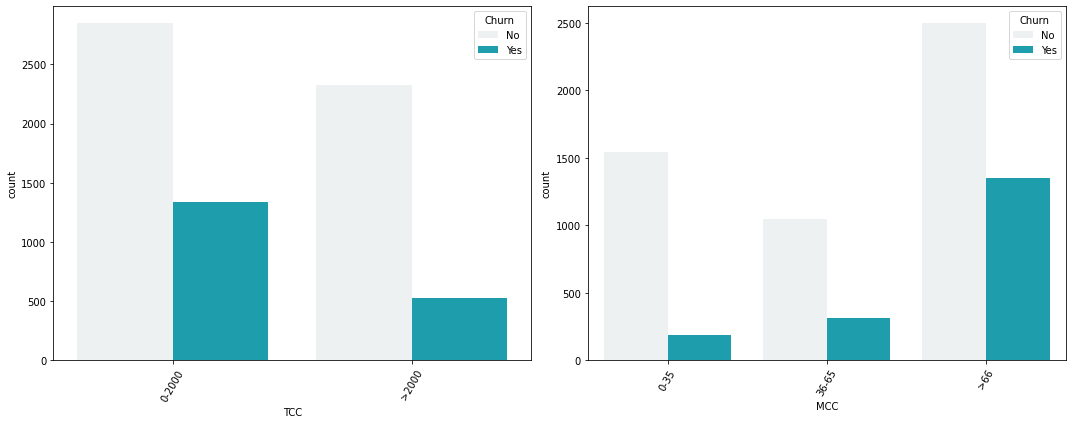

In [65]:
# Churn rates broken out by monthly and total charges 

df_charge_churn = df[['TCC','MCC']]


plt.figure(figsize=(15,6))

col = ['TCC','MCC']

a = 1
for i in range(len(col)):
    plt.subplot(1, 2, a); 
    countplt = sns.countplot(x = df_charge_churn[col[i]], hue = df["Churn"], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

### Convert categorical variables into numeric categories to review correlation

In [66]:
df['gender'] =df['gender'].astype('category').cat.codes
df['tenure'] =df['tenure'].astype('category').cat.codes
df['SeniorCitizen'] =df['SeniorCitizen'].astype('category').cat.codes
df['Partner'] =df['Partner'].astype('category').cat.codes
df['Dependents'] =df['Dependents'].astype('category').cat.codes
df['PhoneService'] =df['PhoneService'].astype('category').cat.codes
df['MultipleLines'] =df['MultipleLines'].astype('category').cat.codes
df['InternetService'] =df['InternetService'].astype('category').cat.codes
df['OnlineSecurity'] =df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup'] =df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection'] =df['DeviceProtection'].astype('category').cat.codes
df['TechSupport'] =df['TechSupport'].astype('category').cat.codes
df['StreamingTV'] =df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies'] =df['StreamingMovies'].astype('category').cat.codes
df['Contract'] =df['Contract'].astype('category').cat.codes
df['PaperlessBilling'] =df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod'] =df['PaymentMethod'].astype('category').cat.codes
df['Churn'] =df['Churn'].astype('category').cat.codes
# User created categorical variabels 
df['tenureCat'] =df['tenureCat'].astype('category').cat.codes
df['TCC'] =df['TCC'].astype('category').cat.codes
df['MCC'] =df['MCC'].astype('category').cat.codes

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureCat,MCC,TCC
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,1,2,29.85,29.85,0,2,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,1,0,3,56.95,1889.50,0,1,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,1,3,53.85,108.15,1,2,1,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,1,0,0,42.30,1840.75,0,1,1,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,1,2,70.70,151.65,1,2,2,0


### Tenure, contract type, tech support, and online security are all highly correlated with customer churn

In [71]:
df[df.columns[1:]].corr()['Churn'][:]

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199037
Churn               1.000000
tenureCat           0.340303
MCC                 0.225187
TCC                -0.148842
Name: Churn, dtype: float64

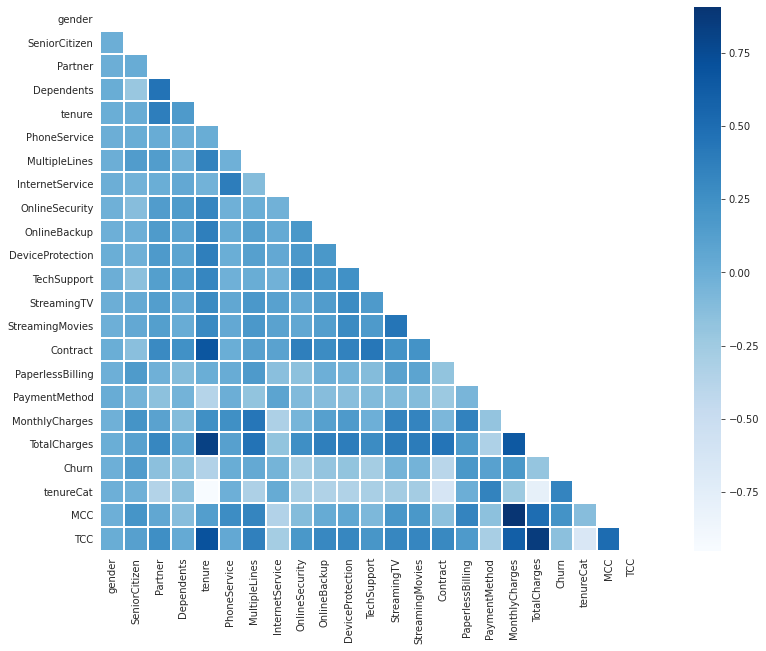

In [70]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="Blues", center=0, linewidths=0.1, square=True)